In [2]:
%pip install scipy

  Using cached https://files.pythonhosted.org/packages/53/10/776750d57ade26522478a92a2e14035868624a6a62f4157b0cc5abd4a980/scipy-1.5.2.tar.gz
  Installing build dependencies ... done


  ERROR: Complete output from command /var/mobile/Containers/Data/Application/947B3EDD-387B-45DC-A7C4-623A3EEFECBC/Library/bin/python3 /var/mobile/Containers/Data/Application/947B3EDD-387B-45DC-A7C4-623A3EEFECBC/Library/lib/python3.7/site-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /private/var/mobile/Containers/Data/Application/947B3EDD-387B-45DC-A7C4-623A3EEFECBC/tmp/tmps1qsxynw:


 error


  ERROR: Traceback (most recent call last):
    File "/var/mobile/Containers/Data/Application/947B3EDD-387B-45DC-A7C4-623A3EEFECBC/Library/lib/python3.7/site-packages/pip/_vendor/pep517/_in_process.py", line 207, in <module>
      main()
    File "/var/mobile/Containers/Data/Application/947B3EDD-387B-45DC-A7C4-623A3EEFECBC/Library/lib/python3.7/site-packages/pip/_vendor/pep517/_in_process.py", line 197, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "/var/mobile/Containers/Data/Application/947B3EDD-387B-45DC-A7C4-623A3EEFECBC/Library/lib/python3.7/site-packages/pip/_vendor/pep517/_in_process.py", line 48, in get_requires_for_build_wheel
      backend = _build_backend()
    File "/var/mobile/Containers/Data/Application/947B3EDD-387B-45DC-A7C4-623A3EEFECBC/Library/lib/python3.7/site-packages/pip/_vendor/pep517/_in_process.py", line 39, in _build_backend
      obj = getattr(obj, path_part)
  AttributeError: module 'setuptools.build_meta' has no attribute __ge

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as optim
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'scipy'

In [67]:
data = pd.read_csv('d://- Downloads//covidar ok.csv', sep=',')
data = data['total_deaths']
data = data.reset_index(drop=False)
data.columns = ['timestep', 'total_deaths']
data

,timestep,total_deaths
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
136,136,2490
137,137,2588
138,138,2702
139,139,2807


In [68]:
def my_logistic(t,a,b,c):
    return c/(1+a*np.exp(-b*t))

In [73]:
#p0 = np.random.exponential(size=3)
p0 = [500, 0.03, 25000]
print(p0)
#bounds = (0,[1001700.,3.,1000000.])
bounds = (0,[1700.,3.,27000.])
x = np.array(data['timestep']) + 1
y = np.array(data['total_deaths'])
(a,b,c),cov = optim.curve_fit(my_logistic,x,y,bounds=bounds,p0=p0)
print(a,b,c)

[500, 0.03, 25000]
762.5090451637801 0.03170593961144782 26999.999999999214


In [74]:
a1 = 680
b1 = 0.0321
c1 = 24747

Text(0, 0.5, 'Muertes')

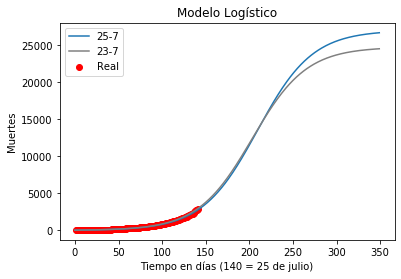

In [75]:
#x1 = np.arange(0,200,1)
x1 = np.arange(0,350,1)
plt.scatter(x, y, color='red')
plt.plot(x1, my_logistic(x1,a,b,c))
plt.plot(x1, my_logistic(x1,a1,b1,c1), color='grey')
plt.title('Modelo Logístico')
plt.legend(['25-7', '23-7', 'Real'])
plt.xlabel('Tiempo en días (140 = 25 de julio)')
plt.ylabel('Muertes')

In [22]:
day=200
my_logistic(day,a,b,c)-my_logistic(day-1,a,b,c)

302.96614265611424

In [23]:
np.log(a)/b

232.17935912165788

## Pronóstico para 23 de Agosto

In [44]:
day= 140
a1 = 680
b1 = 0.0321
c1 = 25000
print("Día:", day)
print("Proyectado Muertos Día:", my_logistic(day,a1,b1,c1)-my_logistic(day-1,a1,b1,c1))
print("Proyectado Muertos Tot:", my_logistic(day,a1,b1,c1))
print("")
print("Pico día:", np.log(a1)/b1)
print("Pico Muertos Día:", my_logistic(np.log(a1)/b1,a1,b1,c1)-my_logistic(np.log(a1)/b1-1,a1,b1,c1))
print("Pico Muertos Tot:", my_logistic(np.log(a1)/b1,a1,b1,c1))


Día: 140
Proyectado Muertos Día: 81.45668552756615
Proyectado Muertos Tot: 2907.119193582578

Pico día: 203.18046100218544
Pico Muertos Día: 200.60777460772988
Pico Muertos Tot: 12499.999999999996
